# Titanic survival project  


**The main objective of this project is to understand what factors contributed to the survival of 
passengers on the Titanic. Python and its libraries will be used to clean the data, perform 
exploratory data analysis, and answer some analytical questions.Tools: Python, Pandas, Matplotlib and Seaborn
Instructions:**

### Part one: Data cleaning

1. Load the Data: Load the Titanic dataset into a Pandas DataFrame.
2. Missing Values: Identify and handle missing values.
3. Data Types: Check the data types of each column and convert them if necessary.
4. Outliers: Identify and handle outliers, if any.


### Part 2: Exploratory Data Analysis (EDA)
1. Summary Statistics: Provide summary statistics for the dataset
2. Correlation Matrix: Create a correlation matrix to understand the relationships between 
different variables.
3. Data Visualization:
• Plot the survival rate based on different features like Pclass, Sex, SibSp, Parch, 
Embarked, etc.
• Use histograms to understand the distribution of numerical variables like Age and 
Fare.
• Use box plots to understand the spread of numerical variables and identify 
outliers.
• Use count plots to visualize categorical variable

### Part 3: Analysis Questions
1. What percentage of passengers survived the Titanic?
2. What was the survival rate for each Pclass?
3. Were gender and survival correlated? Provide statistics.
4. What was the average age of survivors and non-survivors?
5. Did having siblings or spouses on board affect the survival rate?
6. What was the survival rate based on the port of embarkation?
7. How did fare correlate with survival? Did higher fare-paying passengers have better survival?
8. Were age and Pclass correlated? Provide a visualization.
9. What other insights can you draw from the dataset? Provide at least two additional observations 
supported by data and visualizations





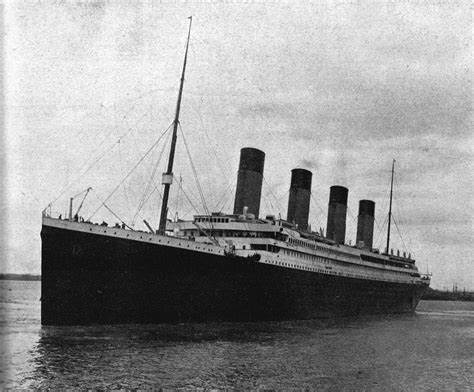


### Part one: Data Cleaning

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pointbiserialr

In [2]:
# converting datasets to dataframes

df1 =pd.read_csv('gender_submission.csv')
df1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
# converting datasets to dataframe
df2=pd.read_csv('test.csv')
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#Converting datasets to dataframe
df3=pd.read_csv('train.csv')
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df1['Survived']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [6]:
# merging datasets(df2,df1)
df2.insert(1,'Survived',df1['Survived'])

In [7]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
#Concating all dataframes
data=[df3,df2]
df=pd.concat(data,ignore_index=True)

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [11]:
# checking for duplicates
df.duplicated().sum()

0

In [12]:
# checking for null values
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
#Descriptive analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [14]:
# dropping column(cabin)- A lot of null values(1014) and isn't needed for the analysis questions
df.drop(columns='Cabin',inplace=True)

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [16]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [17]:
# fill blank column with the mode(S)
df['Embarked'].fillna(value='S',inplace=True)

In [18]:
#check if the blank columns are filled  
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [20]:
# Fill blank column with the average
df['Fare'].fillna(value=33.295,inplace=True)

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [22]:
# creating a clean dataframe( without duplicates and null values)
df_new=df.dropna()

In [23]:
# new dataframe shape
df_new.shape

(1046, 11)

In [24]:
# old dataframe shape
df.shape

(1309, 11)

In [25]:
df_new.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
df_new.duplicated().sum()

0

### Analytical questions
  

In [27]:
# 1. What percentage of passengers survived the titanic 
Total_passengers=df_new['PassengerId'].shape[0]

Total_passengers

1046

In [28]:
# Calculating survival rates:
#Counting the total number of passengers and survivors.

survivors=df_new[df_new['Survived']== 1].shape[0]
survivors

417

In [29]:
# Calculating the percentage of survivors.
percentage_survived=(survivors/Total_passengers)* 100
percentage_survived

39.866156787762904

* The titanic survival rate was 39.87%

In [30]:
# 2. What was the survival rate for each Pclass?
# grouping passengers by their pclass, counting the number of passengers(passengerId,)

df_new.groupby("Pclass").agg(
    total_passengers=("PassengerId","count"),
    survivors=("Survived",lambda x: x.sum()),
    survival_rate=("Survived", lambda x: x.mean()*100)).round(2)


,total_passengers,survivors,survival_rate
Pclass,,,
1,284,170,59.86
2,261,112,42.91
3,501,135,26.95


In [31]:
# 3 Were gender and survival correlated? Provide statistics.
# converting gender to numerical values(0 for male, 1 for female)
sex_value= np.where(df_new['Sex']=="male",0,1)
sex_value

array([0, 1, 1, ..., 1, 1, 0])

In [32]:
# calculating correlation cooefficient
correlation=np.corrcoef(df_new["Survived"],sex_value)[0,1]
correlation

0.6844094839402061

In [33]:
# Interpreting results
if abs(correlation)>= 0.5:
    print("There is a strong correlation between gender and survival")
elif abs(correlation)>=0.3:
    print("There is a moderate correlation between gender and survival")
else:
    print("There is a weak or no correlation between gender and survival")

There is a strong correlation between gender and survival


In [34]:
# 4.What was the average age of survivors and non-survivors?

# Calculating average age for survivors and non-survivors, handling missing values
average_ages = df_new.groupby("Survived")["Age"].mean().round(2)

# Print results in a clear format
print("Average Ages by Survival Status:")
print(f"Survivors: {average_ages[1]} years")
print(f"Non-Survivors: {average_ages[0]} years")


Average Ages by Survival Status:
Survivors: 28.93 years
Non-Survivors: 30.51 years


In [35]:
# 5. Did having siblings or spouses on board affect the survival rate?



# Defining a function to count siblings and spouses
def count_siblings_spouses(row):
    return row["SibSp"] + row["Parch"]  # Combining siblings and spouses

df_new['SiblingsSpouses'] =df_new.apply(count_siblings_spouses,axis=1)




C:\Users\THINK PAD\AppData\Local\Temp\ipykernel_9564\3248692450.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['SiblingsSpouses'] =df_new.apply(count_siblings_spouses,axis=1)


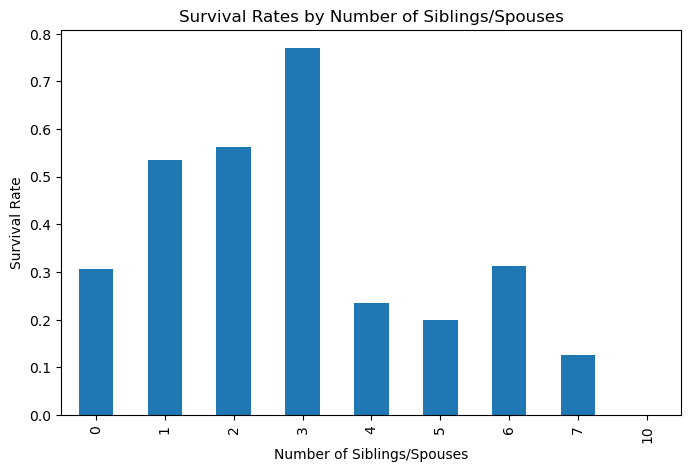

In [36]:
 #Visualization with Matplotlib
plt.figure(figsize=(8, 5))
df_new.groupby("SiblingsSpouses")["Survived"].mean().plot(kind="bar")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Survival Rate")
plt.title("Survival Rates by Number of Siblings/Spouses")
plt.show()



In [37]:
# Statistical test with scipy.stats
passengers_with_family = df_new[df_new["SiblingsSpouses"] > 0]
passengers_without_family = df_new[df_new["SiblingsSpouses"] == 0]
t_statistic, p_value = ttest_ind(
    passengers_with_family["Survived"], passengers_without_family["Survived"]
)



# Interpreting results (assuming a significance level of 0.05)
if p_value < 0.05:
    print("Conclusion: Having siblings or spouses on board had a statistically significant effect on survival.")
else:
    print("Conclusion: There is no statistically significant evidence that having siblings or spouses on board affected survival.")






Conclusion: Having siblings or spouses on board had a statistically significant effect on survival.


In [38]:
# 6.What was the survival rate based on the port of embarkation?
# Grouping passengers by port of embarkation
survival_rates =(df_new.groupby("Embarked")
                .agg(total_passengers=("PassengerId","count"),
    survivors=("Survived",lambda x: x.sum()),
    survival_rate=("Survived", lambda x: x.mean()*100)).round(2) )
survival_rates

,total_passengers,survivors,survival_rate
Embarked,,,
C,212,116,54.72
Q,50,20,40.00
S,784,281,35.84


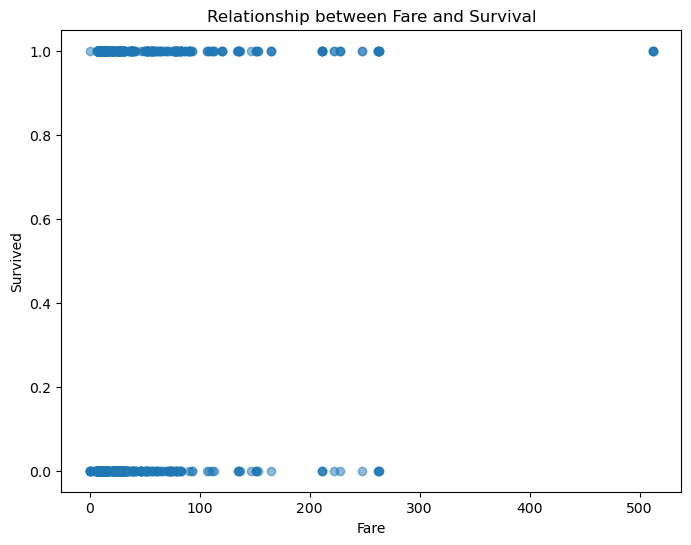

In [39]:
#7. How did fare correlate with survival? Did higher fare-paying passengers have better survival?

# Calculating correlation coefficient
correlation = pointbiserialr(df_new["Survived"], df_new["Fare"])[0]


# Visualizing relationship with scatter plot
plt.figure(figsize= (8,6))
plt.scatter(df_new["Fare"], df_new["Survived"], alpha=0.5)
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.title("Relationship between Fare and Survival")
plt.show()




In [40]:
# Grouping passengers by fare range and calculating survival rates
# Dividing fares into 4 groups
fare_ranges = pd.cut(df_new["Fare"], bins=4)  
survival_rates = (
    df_new.groupby(fare_ranges)
     .agg(
        total_passengers=("PassengerId", "count"),
        survivors=("Survived", lambda x: x.sum()),
        survival_rate=("Survived", lambda x: x.mean() * 100),
    )
    .round(2))
print("Survival Rates by Fare Range:")
print(survival_rates)



Survival Rates by Fare Range:
                    total_passengers  survivors  survival_rate
Fare                                                          
(-0.512, 128.082]                983        374          38.05
(128.082, 256.165]                46         30          65.22
(256.165, 384.247]                13          9          69.23
(384.247, 512.329]                 4          4         100.00


In [41]:
# Interpreting results
if abs(correlation) >= 0.5:
    print("Conclusion: There is a strong correlation between fare and survival.")
elif abs(correlation) >= 0.3:
    print("Conclusion: There is a moderate correlation between fare and survival.")
else:
    print("Conclusion: There is a weak or no correlation between fare and survival.")

Conclusion: There is a weak or no correlation between fare and survival.


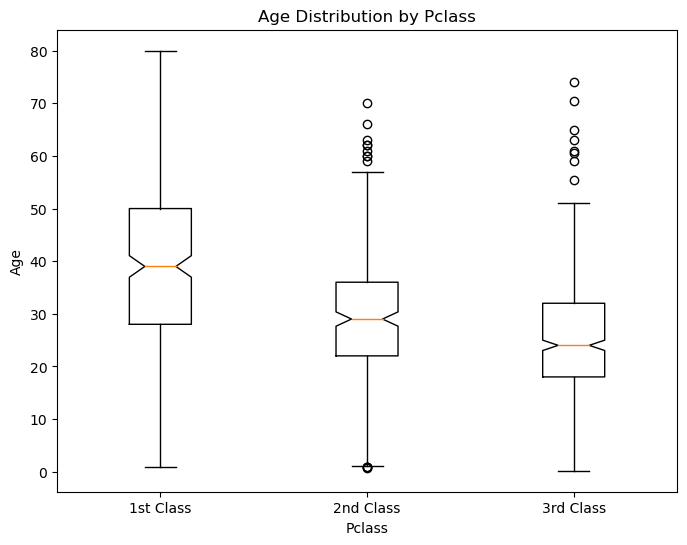

In [42]:
# 8 Were age and Pclass correlated? Provide a visualization.
# Creating box plots to visualize age distribution by P class
plt.figure(figsize=(8, 6))
plt.boxplot(
    [
        df_new[df_new["Pclass"] == 1]["Age"].dropna(),
        df_new[df_new["Pclass"] == 2]["Age"].dropna(),
        df_new[df_new["Pclass"] == 3]["Age"].dropna(),
    ],
    labels=["1st Class", "2nd Class", "3rd Class"],
    notch=True,  # Showing confidence intervals
)
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.title("Age Distribution by Pclass")
plt.show()



In [43]:
# Calculating correlation coefficients
correlation = df_new.corr()
print("Correlation Matrix:", correlation[["Age", "Pclass"]])


Correlation Matrix:                       Age    Pclass
PassengerId      0.028814 -0.064097
Survived        -0.053695 -0.282080
Pclass          -0.408106  1.000000
Age              1.000000 -0.408106
SibSp           -0.243699  0.047221
Parch           -0.150917  0.017224
Fare             0.178229 -0.565069
SiblingsSpouses -0.240229  0.039602


C:\Users\THINK PAD\AppData\Local\Temp\ipykernel_9564\2162525952.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_new.corr()


Survival Rates by Gender         total_passengers  survivors  survival_rate
Sex                                               
female               388        324          83.51
male                 658         93          14.13


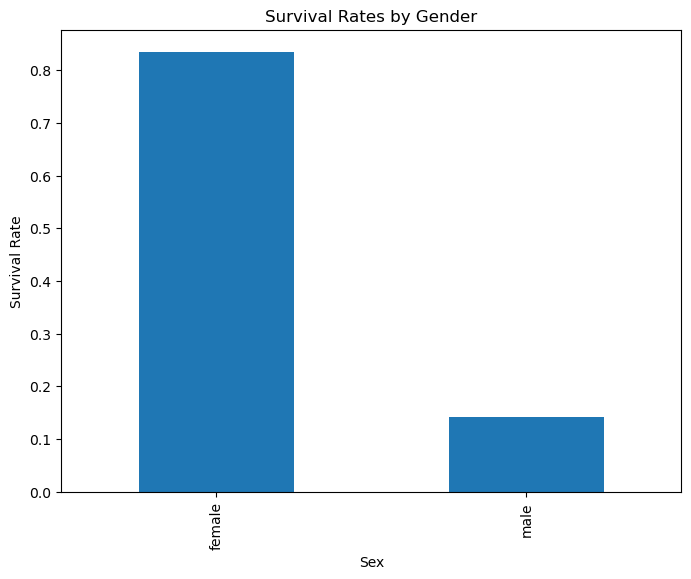

In [44]:
# 9. What other insights can you draw from the dataset? Provide at least two additional observations supported by data and visualizations
# Gender and Survival Rate:

# Hypothesis: Women had a higher survival rate than men.

# Calculating survival rates by gender
survival_rates = (
    df_new.groupby("Sex")
    .agg(
        total_passengers=("PassengerId", "count"),
        survivors=("Survived", lambda x: x.sum()),
        survival_rate=("Survived", lambda x: x.mean() * 100),
    )
    .round(2)
)
print("Survival Rates by Gender", survival_rates)

# Visualizing survival rates
plt.figure(figsize=(8, 6))
df_new.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.title("Survival Rates by Gender")
plt.show()


* Observation: Women had a significantly higher survival rate compared to men

Survival Rates by Cabin Class:         total_passengers  survivors  survival_rate
Pclass                                            
1                    284        170          59.86
2                    261        112          42.91
3                    501        135          26.95


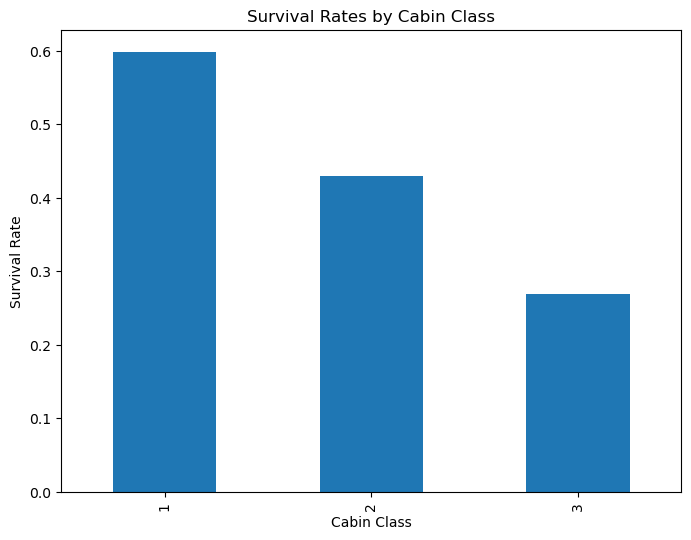

In [45]:
# Cabin Class and Survival Rate:

# Hypothesis: Passengers in higher cabin classes had higher survival rates.
# Calculating survival rates by cabin class
survival_rates = (
    df_new.groupby("Pclass")
    .agg(
        total_passengers=("PassengerId", "count"),
        survivors=("Survived", lambda x: x.sum()),
        survival_rate=("Survived", lambda x: x.mean() * 100),
    )
    .round(2)
)
print("Survival Rates by Cabin Class:", survival_rates)

# Visualizing survival rates
plt.figure(figsize=(8, 6))
df_new.groupby("Pclass")["Survived"].mean().plot(kind="bar")
plt.xlabel("Cabin Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rates by Cabin Class")
plt.show()


* Observation: Survival rates decreased as cabin class increased.